# 🚀 Linear Regression Assignment: California Housing

Welcome to your Linear Regression assignment! In this notebook, you will apply what you've learned to a real-world dataset: predicting house prices in California.

### 🎯 Objective:
Build a regression model to predict the median house value for California districts based on various features (like median income, number of rooms, etc.).


---
## 📦 Step 0: Imports
Import the necessary libraries for data manipulation, visualization, and machine learning.

In [1]:
# TODO: Import pandas, numpy, matplotlib.pyplot, seaborn
# TODO: Import train_test_split, StandardScaler
# TODO: Import LinearRegression, metrics (mean_absolute_error, mean_squared_error, r2_score)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Add your scikit-learn imports below:
from sklearn.datasets import _california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV




---
## 1️⃣ Part 1: Data Loading & Overview
We will use the California Housing dataset built into Scikit-Learn.

In [ ]:
from sklearn.datasets import fetch_california_housing

# Load the dataset
california = fetch_california_housing(as_frame=True)
df = california.frame

# TODO: Display the first 5 rows of the dataframe
df.head()



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**💡 Hint:** 
- Use `df.info()` to check for any missing values and see the data types.
- Use `df.describe()` to get a statistical summary of the features.

Our **Target Variable** is `MedHouseVal` (Median house value in $100,000s).

In [6]:
# TODO: Check data info and basic statistics
print("Dataset Info:")
df.info()

print("\nBasic Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB

Basic Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.

---
## 2️⃣ Part 2: Exploratory Data Analysis (EDA)
Before training a model, it's crucial to understand the data's distribution and relationships.

<Axes: xlabel='MedHouseVal', ylabel='Count'>

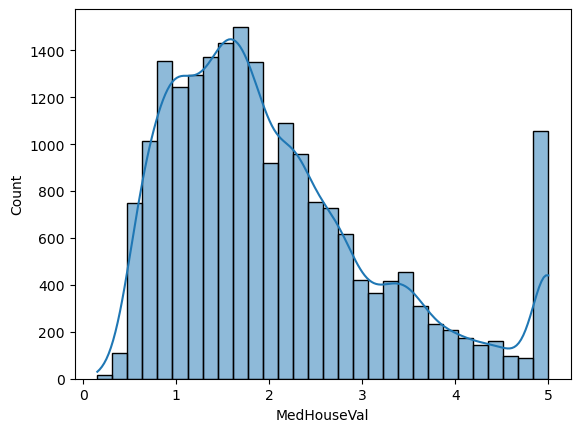

In [8]:
# TODO: Plot a histogram of the target variable (MedHouseVal)
# Hint: sns.histplot(df['MedHouseVal'], kde=True, bins=30)
sns.histplot(df['MedHouseVal'],kde=True,bins=30)


<Axes: >

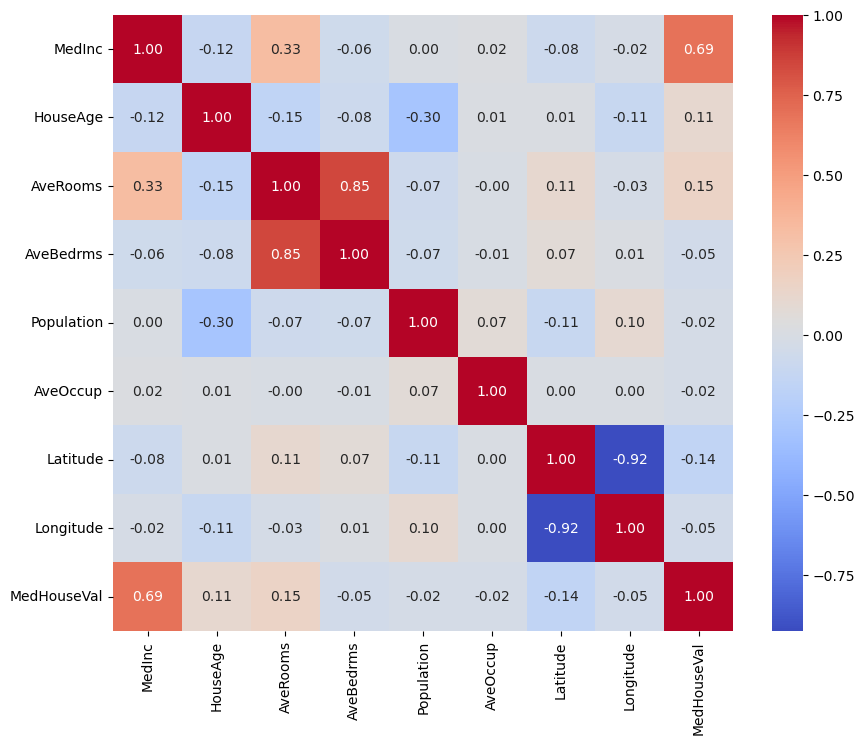

In [9]:
# TODO: Plot a correlation matrix heatmap to see which features correlate most with MedHouseVal
# Hint: plt.figure(figsize=(10, 8))
# Hint: sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.figure(figsize=(10,8)) # size (width,height)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f") #df.corr() =>correlation between every pair of columns.,cmap=color theme



**❓ Question:** Based on the correlation matrix, which feature has the strongest positive correlation with the house value? Which one has the strongest negative correlation?

---
## 3️⃣ Part 3: Data Preprocessing
Now, let's prepare the data for our machine learning model.

In [10]:
# 1. Separate features (X) and target (y)
X = df.drop("MedHouseVal", axis=1) # It gets all features except MedHouseVal - Its a column , so axis=1
y = df["MedHouseVal"]

# TODO: 2. Split the data into Training and Testing sets (e.g., 80% train, 20% test)
# Hint: X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (16512, 8)
X_test shape: (4128, 8)
y_train shape: (16512,)
y_test shape: (4128,)


**⚠️ Important:** Notice that features like `MedInc` (income) and `Population` are on completely different scales. We need to standardize them!

In [ ]:
# TODO: 3. Scale the features using StandardScaler
# Hint: scaler = StandardScaler()
# Hint: X_train_scaled = scaler.fit_transform(X_train)
# Hint: X_test_scaled = scaler.transform(X_test)


#MedInc → values around 1 to 15 , Population → values in thousands, Latitude → around 32–42 => If we dont scale Gradient descent converges slowly

scaler = StandardScaler()
# Always fit on train data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # we only use transform on test data

#StandardScaler is a preprocessing technique used in machine learning to standardize features so they all have a similar scale. It transforms each feature by subtracting its mean and dividing by its standard deviation
#StandardScaler is important because many machine learning algorithms—especially those using gradient descent like Linear Regression, Logistic Regression, and Neural Networks—perform better when features are on similar scales. If one feature has values in the thousands and another has values between 1 and 10, the larger-scale feature can dominate the learning process and slow down convergence. By scaling, we ensure all features contribute more evenly to the model and optimization becomes more stable and faster.



---
## 4️⃣ Part 4: Model Training
Time to train the Linear Regression model!

In [12]:
# TODO: Initialize and train the Linear Regression model
# Hint: lin_reg = LinearRegression()
# Hint: lin_reg.fit(X_train_scaled, y_train)
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


---
## 5️⃣ Part 5: Model Evaluation
Let's test our model on the unseen Test data and see how well it performs.

In [ ]:
# TODO: Make predictions on the scaled test set
# Hint: y_pred = lin_reg.predict(X_test_scaled)
y_pred = lin_reg.predict(X_test_scaled)

# TODO: Calculate and print MAE, RMSE, and R2 Score
# Hint: mae = mean_absolute_error(y_test, y_pred)
#       rmse = np.sqrt(mean_squared_error(y_test, y_pred)) 
#       r2 = r2_score(y_test, y_pred)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print(f"mae - {mae},rmse-{rmse},r2-{r2} ")



mae - 0.5332001304956561,rmse-0.7455813830127762,r2-0.575787706032451 


---
## 🌟 Bonus / Advanced Challenge
Can you improve the error? Try using **Ridge** or **Lasso** regression to see if the R2 score goes up, or identify which features get reduced to 0 by Lasso!


In [20]:
# Try Ridge or Lasso Regression here:

ridge = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0])
ridge.fit(X_train_scaled,y_train)

y_pred_ridge = ridge.predict(X_test_scaled)
mea_ridge = mean_absolute_error(y_test,y_pred_ridge)
mse_ridge = mean_squared_error(y_test,y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test,y_pred_ridge)
print(f"mea_ridge - {mea_ridge},rmse_ridge-{rmse_ridge},r2_ridge-{r2_ridge} ")


lasso = LassoCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0])
lasso.fit(X_train_scaled,y_train)

y_pred_lasso = lasso.predict(X_test_scaled)
mea_lasso = mean_absolute_error(y_test,y_pred_lasso)
mse_lasso = mean_squared_error(y_test,y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test,y_pred_lasso)
print(f"mea_lasso - {mea_lasso},rmse_lasso-{rmse_lasso},r2_lasso-{r2_lasso} ")

mea_ridge - 0.5331931195808581,rmse_ridge-0.7455567442837308,r2_ridge-0.5758157428888049 
mea_lasso - 0.5353261423609053,rmse_lasso-0.7404423656125414,r2_lasso-0.5816154300698727 
